In [ ]:
!pip install transformers
!pip install camel-tools
!camel_data full

     |████████████████████████████████| 3.5 MB 11.7 MB/s 
     |████████████████████████████████| 67 kB 2.2 MB/s 
     |████████████████████████████████| 6.8 MB 52.9 MB/s 
     |████████████████████████████████| 596 kB 49.4 MB/s 
     |████████████████████████████████| 895 kB 59.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 58 kB 4.3 MB/s 
     |████████████████████████████████| 418 kB 25.0 MB/s 
  Created wheel for camel-tools: filename=camel_tools-1.2.0-py3-none-any.whl size=99048 sha256=818aed93b9bb6ac721e49f62d8a62b37f56f749ace09badb135434d267eabe40
  Stored in directory: /root/.cache/pip/wheels/05/ad/a1/e8aa569c102f0b8b3522ae515b7d0696046e4490c0ff4edb0a
  Created wheel for camel-kenlm: filename=camel_kenlm-2021.12.27-cp37-cp37m-linux_x86_64.whl size=2336835 sha256=4092bfb0fa2394714382ab8769786b8038743a00f624688a1497a8f8f01c2803
  St

In [ ]:
# preprocess data to remove diacratics and be consistent with BERT
!git clone https://github.com/aub-mind/arabert
!cp arabert/examples/question-answering/utils_qa.py .
!cp arabert/examples/question-answering/trainer_qa.py .
!cp arabert/examples/question-answering/run_qa.py .
!cp arabert/examples/question-answering/squad_preprocessing.py .

In [ ]:
model_name="lanwuwei/GigaBERT-v3-Arabic-and-English"
!pip install datasets
!pip install sentencepiece
#only needed for AraBERTv1 and v2
!pip install farasapy
!pip install pyarabic
!pip install fuzzysearch


     |████████████████████████████████| 312 kB 12.3 MB/s 
     |████████████████████████████████| 243 kB 63.2 MB/s 
     |████████████████████████████████| 133 kB 64.9 MB/s 
     |████████████████████████████████| 1.1 MB 64.8 MB/s 
     |████████████████████████████████| 144 kB 52.4 MB/s 
     |████████████████████████████████| 94 kB 3.4 MB/s 
     |████████████████████████████████| 271 kB 55.8 MB/s 
     |████████████████████████████████| 1.2 MB 12.0 MB/s 
     |████████████████████████████████| 126 kB 11.9 MB/s 
     |████████████████████████████████| 112 kB 11.5 MB/s 
  Created wheel for fuzzysearch: filename=fuzzysearch-0.7.3-cp37-cp37m-linux_x86_64.whl size=280757 sha256=215dc822ee144852475810ef9deb1e5fdf34d39bebbc92c1d868fdcd1960d69c
  Stored in directory: /root/.cache/pip/wheels/59/11/b5/bae34cc61880d909103c30a1c547df857f5a46adeabfd922b5
Successfully built fuzzysearch


# Preprocess the data to remove diacracticts and be consistant with BERT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -rf *-pre.json
!python squad_preprocessing.py \
  --input_file "/content/drive/MyDrive/KGE_checkpoints/kge-master/KGE_enriched_PLM/data/tydiqa-goldp-v1.1-train-ar.json" \
  --output_file "tydiqa-goldp-v1.1-train-ar-pre.json" \
  --model_name=$model_name \
  --filter_tydiqa=False

In [ ]:
!rm -rf *-pre.json
!python squad_preprocessing.py \
  --input_file "/content/drive/MyDrive/KGE_checkpoints/kge-master/KGE_enriched_PLM/data/tydiqa-goldp-v1.1-dev-ar.json" \
  --output_file "/content/drive/MyDrive/KGE_checkpoints/kge-master/tydiqa-goldp-v1.1-dev-ar-pre.json" \
  --model_name=$model_name \
  --filter_tydiqa=False

# load data, concepts and concept embedding

In [ ]:
# retrieve and install project in development mode
%cd /content/drive/MyDrive/KGE_checkpoints/kge-master
!pip install -e .

/content/drive/MyDrive/KGE_checkpoints/kge-master
Obtaining file:///content/drive/MyDrive/KGE_checkpoints/kge-master
     |████████████████████████████████| 776.8 MB 13 kB/s 
     |████████████████████████████████| 690 kB 53.8 MB/s 
     |████████████████████████████████| 3.4 MB 47.2 MB/s 
     |████████████████████████████████| 325 kB 58.4 MB/s 
     |████████████████████████████████| 25.3 MB 1.2 MB/s 
     |████████████████████████████████| 486 kB 64.9 MB/s 
     |████████████████████████████████| 475 kB 68.2 MB/s 
     |████████████████████████████████| 395 kB 74.3 MB/s 
     |████████████████████████████████| 310 kB 71.4 MB/s 
  Created wheel for gpytorch: filename=gpytorch-1.6.0-py2.py3-none-any.whl size=509889 sha256=bc73fedcfbe585c717ee81f58a0303ad8e1527385dc79bd80232324f7848096d
  Stored in directory: /root/.cache/pip/wheels/66/b5/89/34c06ad393a6feb72b4cdde46d0f1c667f3e2632960f9df109
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=d1cdb61

In [ ]:
!pip install arabic-reshaper
!pip install python-bidi

# Preprocess data and concepts and save into pt file

In [ ]:
from kge.model import KgeModel
from transformers import AutoTokenizer, AutoModel
import torch.utils.data 
import pickle
import json
import sys
from typing import List


from KGE_enriched_PLM.dataloader import DatasetArabicTyDiQA, DataLoaderTyDiQA
from torch.utils.data import Dataset, DataLoader, TensorDataset
from KGE_enriched_PLM.model_main import KGEEnrichment
from KGE_enriched_PLM.preprocess_main import Processing
from tqdm import tqdm

from kge.util.io import load_checkpoint
import torch
import pandas as pd
from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_teh_marbuta_ar
from camel_tools.utils.normalize import normalize_alef_ar




 
# preprocess data and save data and concepts into pt file

def normalize_entity(s):
    s= normalize_alef_maksura_ar(s)
    s= normalize_teh_marbuta_ar(s)
    s= normalize_alef_ar(s)

    return s

# build a dictinary of embedding. key: entity name, value: embedding
def getEntityEmbeddings(kge_model):
    e = {}
    entity_dict = '/content/drive/MyDrive/KGE_checkpoints/kge-master/data/wikidata/entity_ids.del'
   
    print('Loading entity_ids.del')
    embedder = kge_model._entity_embedder
    f = open(entity_dict, 'r')
    for line in f:
        line = line[:-1].split('\t')
        ent_id = int(line[0])
        ent_name = line[1]
        ent_name=normalize_entity(ent_name)
        e[ent_name] = embedder._embeddings(torch.LongTensor([ent_id]))[0]
    f.close()
    return e

# build consistent entity2idx dict, idx2entity dict and embedding matrix( contains embedding) 
def prepare_embeddings(embedding_dict):
    entity2idx = {}
    idx2entity = {}
    embedding2entity={}
    ents=[]
    i = 0
    embedding_matrix = []
    for key, entity in embedding_dict.items():
        entity2idx[key] = i
        idx2entity[i] = key
        embedding2entity[entity]=key
        ents.append(key)
        i += 1
        embedding_matrix.append(entity)
    return entity2idx, idx2entity, embedding_matrix, embedding2entity, ents

def load_data(data_path):
   
  with open(data_path, 'rb') as f:
       squad_dict = json.load(f)

  data=[]
  for group in squad_dict['data']:
     for passage in group['paragraphs']:
      
        for qa in passage['qas']:
           ans=[]
           example={'title':str,'id':str, 'context':str, 'question':str, 'answers':[]}
           example['question']=qa['question']
           example['context']=passage['context']
           example['id']=qa['id']
           example['title']=group['title']
           for answer in qa['answers']:
              ans.append(answer)

           example['answers']=ans
           data.append(example)

  return data

def load_kaiflematha_data(data_path):
   
  with open(data_path, 'rb') as f:
       squad_dict = json.load(f)

  data=[]
  for group in squad_dict['data']:
     #for passage in group['paragraphs']:
      
        for qa in group['qas']:
           ans=[]
           example={'title':str,'id':str, 'context':str, 'question':str, 'answers':[]}
           example['question']=qa['question']
           example['context']=group['context']
           example['id']=qa['id']
           example['title']=group['title']
           for answer in qa['answers']:
              ans.append(answer)

           example['answers']=ans
           data.append(example)

  return data

def load_concepts(concepts_path):

  with open(concepts_path, 'rb') as f:

    data = pickle.load(f)
  return data

#*******************

# 1)retrieve embedding
checkpoint_file = '/content/drive/MyDrive/KGE_checkpoints/kge-master/local/experiments/20210728-053757-config/checkpoint_best.pt'
print('Loading kg embeddings from', checkpoint_file)

kge_checkpoint = load_checkpoint(checkpoint_file)
kge_model = KgeModel.create_from(kge_checkpoint)

entity_embeddings = kge_checkpoint["model"][0]["_entity_embedder._embeddings.weight"]
relation_embeddings = kge_checkpoint["model"][0]["_relation_embedder._embeddings.weight"]

# build a dictinary of embedding. key: entity name, value: embedding
e = getEntityEmbeddings(kge_model)
# build consistent entity2idx dict, idx2entity dict and embedding matrix( contains embedding)
entity2idx, idx2entity, embedding_matrix, embedding2entity, ents = prepare_embeddings(e)
#**********************************
model_name="lanwuwei/GigaBERT-v3-Arabic-and-English"


#2) Load  dataset and concepts
train_data_path='/content/drive/MyDrive/KGE_checkpoints/Direct_concepts/Datasets/TyDiQA/train-pre.json'
dev_data_path='/content/drive/MyDrive/KGE_checkpoints/Direct_concepts/Datasets/TyDiQA/dev-pre.json'
#test_data_path='/content/drive/MyDrive/KGE_checkpoints/Direct_concepts/Datasets/KaifLematha/test-pre.json'
train_concepts_path= '/content/drive/MyDrive/KGE_checkpoints/Direct_concepts/TyDiQA/wikidata_tydiqa_train_scored_40_concepts.bin'
dev_concepts_path= '/content/drive/MyDrive/KGE_checkpoints/Direct_concepts/TyDiQA/wikidata_tydiqa_dev_scored_40_concepts.bin'
#test_concepts_path= '/content/drive/MyDrive/KGE_checkpoints/Direct_concepts/KaifLematha/final/test/wikidata_test_scored_40.bin'


wikidata_train_concepts= load_concepts(train_concepts_path)
wikidata_dev_concepts= load_concepts(dev_concepts_path)
#wikidata_test_concepts= load_concepts(test_concepts_path)

print(wikidata_train_concepts[0])

train_data= load_data(train_data_path)
dev_data= load_data(dev_data_path)
#test_data= load_data(test_data_path)



# 3)preprocess and generate TensorDataset for training set


#prepeare tensor of data and concept and save it
proc = Processing(entity2idx, model_name)
train_features=[]

i=0
for ex in train_data:
   ft, offset_mapping, example_id  = proc.prepare_train_features(ex, wikidata_train_concepts[i])
   for f in ft:
       train_features.append(f)
   

   i+=1

# Convert to Tensors and build training set
all_input_ids = torch.tensor([f['input_ids'] for f in train_features], dtype=torch.long)
all_attention_masks = torch.tensor([f['attention_masks'] for f in train_features], dtype=torch.long)
all_token_type_ids = torch.tensor([f['token_type_ids'] for f in train_features], dtype=torch.long)
all_start_positions = torch.tensor([f['start_positions'] for f in train_features], dtype=torch.long)
all_end_positions = torch.tensor([f['end_positions'] for f in train_features], dtype=torch.long)
all_concept_ids = torch.tensor([f['concept_ids'] for f in train_features], dtype=torch.long)
all_padded_concepts_mask = torch.tensor([f['padded_concepts_mask'] for f in train_features], dtype=torch.bool)

print('all_input_id shape: ', all_input_ids.shape)
print('all_attention_masks shape: ', all_attention_masks.shape)
print('all_token_type_ids shape: ', all_token_type_ids.shape)
print('all_start_positions shape: ', all_start_positions.shape)
print('all_end_positions shape: ', all_end_positions.shape)
print('all_concept_ids shape: ', all_concept_ids.shape)
print('all_padded_concepts_mask shape: ', all_padded_concepts_mask.shape)


train_data_tensor = TensorDataset(
                all_input_ids,
                all_attention_masks,
                all_token_type_ids,
                all_start_positions,
                all_end_positions,
                all_concept_ids,
                all_padded_concepts_mask
                
            )

# 4)preprocess and generate TensorDataset for dev set

#prepeare tensor of data and concept and save it
val_features=[]
all_offsetmapping=[]
val_example_id=[]
i=0

for ex in dev_data:
   ft, offset_mapping, example_id = proc.prepare_validation_features(ex, wikidata_dev_concepts[i])
   for f in ft:
       val_features.append(f)
   for off in offset_mapping:
     all_offsetmapping.append(off)
   for ex in example_id:
     val_example_id.append(ex)
   
   i+=1

# Convert to Tensors and build dev set
all_input_ids = torch.tensor([f['input_ids'] for f in val_features], dtype=torch.long)
all_attention_masks = torch.tensor([f['attention_masks'] for f in val_features], dtype=torch.long)
all_token_type_ids = torch.tensor([f['token_type_ids'] for f in val_features], dtype=torch.long)
all_concept_ids = torch.tensor([f['concept_ids'] for f in val_features], dtype=torch.long)
all_padded_concepts_mask = torch.tensor([f['padded_concepts_mask'] for f in val_features], dtype=torch.bool)
all_start_positions = torch.tensor([f['start_positions'] for f in val_features], dtype=torch.long)
all_end_positions = torch.tensor([f['end_positions'] for f in val_features], dtype=torch.long)

print('all_input_id shape: ', all_input_ids.shape)
print('all_attention_masks shape: ', all_attention_masks.shape)
print('all_token_type_ids shape: ', all_token_type_ids.shape)
print('all_concept_ids shape: ', all_concept_ids.shape)
print('all_padded_concepts_mask shape: ', all_padded_concepts_mask.shape)
print('all_start_positions shape: ', all_start_positions.shape)
print('all_end_positions shape: ', all_end_positions.shape)



dev_data_tensor = TensorDataset(
                all_input_ids,
                all_attention_masks,
                all_token_type_ids,
                all_start_positions,
                all_end_positions, 
                all_concept_ids,
                all_padded_concepts_mask
                
            )
'''
# 5)preprocess and generate TensorDataset for test set

#prepeare tensor of data and concept and save it
test_features=[]
test_offsetmapping=[]
test_example_id=[]
i=0

for ex in test_data:
   ft, offset_mapping, example_id = proc.prepare_validation_features(ex, wikidata_test_concepts[i])
   for f in ft:
       test_features.append(f)
   for off in offset_mapping:
     test_offsetmapping.append(off)
   for ex in example_id:
     test_example_id.append(ex)
   
   i+=1

# Convert to Tensors and build dev set
all_input_ids = torch.tensor([f['input_ids'] for f in test_features], dtype=torch.long)
all_attention_masks = torch.tensor([f['attention_masks'] for f in test_features], dtype=torch.long)
all_token_type_ids = torch.tensor([f['token_type_ids'] for f in test_features], dtype=torch.long)
all_concept_ids = torch.tensor([f['concept_ids'] for f in test_features], dtype=torch.long)
all_padded_concepts_mask = torch.tensor([f['padded_concepts_mask'] for f in test_features], dtype=torch.bool)
all_start_positions = torch.tensor([f['start_positions'] for f in test_features], dtype=torch.long)
all_end_positions = torch.tensor([f['end_positions'] for f in test_features], dtype=torch.long)

print('all_input_id shape: ', all_input_ids.shape)
print('all_attention_masks shape: ', all_attention_masks.shape)
print('all_token_type_ids shape: ', all_token_type_ids.shape)
print('all_concept_ids shape: ', all_concept_ids.shape)
print('all_padded_concepts_mask shape: ', all_padded_concepts_mask.shape)
print('all_start_positions shape: ', all_start_positions.shape)
print('all_end_positions shape: ', all_end_positions.shape)



test_data_tensor = TensorDataset(
                all_input_ids,
                all_attention_masks,
                all_token_type_ids,
                all_start_positions,
                all_end_positions, 
                all_concept_ids,
                all_padded_concepts_mask
                
            )
'''

Loading kg embeddings from /content/drive/MyDrive/KGE_checkpoints/kge-master/local/experiments/20210728-053757-config/checkpoint_best.pt
Loading configuration of dataset wikidata from /content/drive/MyDrive/KGE_checkpoints/kge-master/data/wikidata ...
Setting complex.relation_embedder.dropout to 0., was set to -0.4746062345802784.
Loading entity_ids.del
{'id': 'arabic--7873889237709442006-0', 'doc_entities': [{'entity': 'أوروبا', 'start': 129, 'label': 'B-LOC', 'end': 135, 'kb_entity': ['اوروبا', 'اوروبا'], 'concepts': [834, 2768, 332, 35546, 361, 4963, 23115, 343887, 23115, 14186, 21170, 167117, 285741, 814544, 35962, 565229, 65990, 14420, 269077, 777852, 290390, 639910, 79313, 143948, 1081, 469182, 993, 958644, 23328, 1119624, 1146796, 553440, 58349, 98795, 565228, 1069668, 581822, 782128, 831282]}, {'entity': 'القسطنطينية', 'start': 157, 'label': 'B-LOC', 'end': 168, 'kb_entity': ['القسطنطينيه', 'القسطنطينيه'], 'concepts': [10434, 4390, 13503, 14186, 43509, 125820, 10434, 8640, 1977

"\n# 5)preprocess and generate TensorDataset for test set\n\n#prepeare tensor of data and concept and save it\ntest_features=[]\ntest_offsetmapping=[]\ntest_example_id=[]\ni=0\n\nfor ex in test_data:\n   ft, offset_mapping, example_id = proc.prepare_validation_features(ex, wikidata_test_concepts[i])\n   for f in ft:\n       test_features.append(f)\n   for off in offset_mapping:\n     test_offsetmapping.append(off)\n   for ex in example_id:\n     test_example_id.append(ex)\n   \n   i+=1\n\n# Convert to Tensors and build dev set\nall_input_ids = torch.tensor([f['input_ids'] for f in test_features], dtype=torch.long)\nall_attention_masks = torch.tensor([f['attention_masks'] for f in test_features], dtype=torch.long)\nall_token_type_ids = torch.tensor([f['token_type_ids'] for f in test_features], dtype=torch.long)\nall_concept_ids = torch.tensor([f['concept_ids'] for f in test_features], dtype=torch.long)\nall_padded_concepts_mask = torch.tensor([f['padded_concepts_mask'] for f in test_fea

In [ ]:
from kge.model import KgeModel
from transformers import AutoTokenizer, AutoModel, AdamW
from transformers import get_scheduler
import torch.utils.data 
import pickle
import json
import sys
from typing import List
from datasets import load_dataset, load_metric

from sklearn.model_selection import KFold
from KGE_enriched_PLM.dataloader import DatasetArabicTyDiQA, DataLoaderTyDiQA
from torch.utils.data import Dataset, DataLoader, TensorDataset
from KGE_enriched_PLM.model_main import KGEEnrichment
from KGE_enriched_PLM.preprocess_main import Processing
from tqdm import tqdm

from kge.util.io import load_checkpoint
import torch
import pandas as pd
from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_teh_marbuta_ar
from camel_tools.utils.normalize import normalize_alef_ar
from torch.optim.lr_scheduler import ExponentialLR, ReduceLROnPlateau
import matplotlib.pyplot as plt




#**********************main*************************#
#******************train******************************#
print(len(all_offsetmapping))
nb_epochs= 2
#lr= 3e-5 
lr= 5e-5
validate_every=10
model_name="lanwuwei/GigaBERT-v3-Arabic-and-English"
batch_size= 8
# 


#**********************************


# use CUDA
device = torch.device("cuda")


train = DatasetArabicTyDiQA(train_data_tensor)
train_loader = DataLoader(train, batch_size=batch_size, shuffle=True, num_workers=0)
 
dev = DatasetArabicTyDiQA(dev_data_tensor)
dev_loader = DataLoader(dev, batch_size=batch_size, num_workers=0)

#test = DatasetArabicTyDiQA(test_data_tensor)
#testloader = DataLoader(test, batch_size=batch_size, num_workers=0)

#building the model
print('Creating model...')
model = KGEEnrichment(model_name, embedding_matrix, idx2entity)
print('Model created!')
model.to(device)


#initilize optimaization

optimizer = AdamW(model.parameters(), lr=lr)
num_training_steps = nb_epochs * len(train_loader)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps
)
optimizer.zero_grad()




train_losses=[]
test_losses=[]



for epoch in range(nb_epochs):
      # training phase  
      model.train()
      # model.apply(set_bn_eval)
      trainloader = tqdm(train_loader, total=len(train_loader), unit="batches")
      running_loss = 0
      print('****') 
      for i_batch, batch in enumerate(trainloader):
                    
           model.zero_grad(set_to_none=True)
           #add data to device (features and labels)
           input_ids = batch[0].to(device)
           attention_mask = batch[1].to(device)
           token_type_ids = batch[2].to(device)
           start_positions = batch[3].to(device)
           end_positions = batch[4].to(device)
           concept_ids = batch[5].to(device)
           all_padded_concepts_mask= batch[6].to(device)
                    
           '''
           print("input_ids", input_ids.shape)
           print("attention_mask", attention_mask.shape)
           print("token_type_ids", token_type_ids.shape)
           print("concept_ids", concept_ids.shape)
           print("end_positions", end_positions.shape)
           print("all_padded_concepts_mask", all_padded_concepts_mask.shape)
           '''
           is_training= True

           loss = model(input_ids, attention_mask, token_type_ids, start_positions, end_positions, concept_ids, all_padded_concepts_mask, i_batch,is_training, analysis= False)
           loss.backward()
           optimizer.step()
           running_loss += loss.item()
           #loader.set_postfix(Loss=running_loss/((i_batch+1)*batch_size), Epoch=epoch)
           #loader.set_postfix(Loss=loss.item(), Epoch=epoch)
           #loader.set_description('{}/{}'.format(epoch+1, nb_epochs))
           #loader.update()   
           lr_scheduler.step()
           
      train_loss = running_loss/len(trainloader)
      train_losses.append(train_loss)

           
      # Evaluation Phase 
      print('**Evaluation**')        
      model.eval()
      test_loader = tqdm(dev_loader, total=len(dev_loader), unit="batches")
      start_logits_dev=[]
      end_logits_dev=[]
      running_loss=0

    
      with torch.no_grad():
        for i_batch, batch in enumerate(dev_loader):
                    
             model.zero_grad(set_to_none=True)
             #add data to device (features and labels)
             input_ids = batch[0].to(device)
             attention_mask = batch[1].to(device)
             token_type_ids = batch[2].to(device)
             start_positions = batch[3].to(device)
             end_positions = batch[4].to(device)
             concept_ids = batch[5].to(device)
             all_padded_concepts_mask= batch[6].to(device)
   
             start_logits, end_logits, loss= model(input_ids, attention_mask, token_type_ids, start_positions, end_positions, concept_ids, all_padded_concepts_mask, i_batch, is_training= False, analysis= False) 
             running_loss+=loss.item()
           
             for s in start_logits:
               start_logits_dev.append(s)
             for e in end_logits:
               end_logits_dev.append(e)

      # validation loss for this epoch
      test_loss=running_loss/len(dev_loader)
      test_losses.append(test_loss)
      
      print('Train Loss: %.3f | epoch: %d'%(train_loss,epoch+1))
      print('Test Loss: %.3f | epoch: %d'%(test_loss,epoch+1))
  
'''  
plt.plot(train_losses,'-o')
plt.plot(test_losses,'-o')
plt.xlabel('epochs')
plt.ylabel('losses')
plt.legend(['Train','Valid'])
plt.title('Train vs Valid Losses')
 
plt.show() 
'''
#post processing  validation data to compte mertics
final_predictions = proc.postprocess_qa_predictions(dev_data, val_features, val_example_id, all_offsetmapping , start_logits_dev , end_logits_dev)          
squad_v2= False
metric = load_metric("squad_v2" if squad_v2 else "squad")

if squad_v2:
    formatted_predictions = [{"id": k, "prediction_text": v, "no_answer_probability": 0.0} for k, v in final_predictions.items()]
else:
    formatted_predictions = [{"id": k, "prediction_text": v} for k, v in final_predictions.items()]
references = [{"id": ex["id"], "answers": ex["answers"]} for ex in dev_data]

print("prediction ", formatted_predictions[0])
print("references ", references[0])

print(metric.compute(predictions=formatted_predictions, references=references))
'''
# Test 
# Test Phase 
print('**Test**')        
model.eval()
start_logits_test=[]
end_logits_test=[]
running_loss=0   

with torch.no_grad():
        for i_batch, batch in enumerate(testloader):
                    
               model.zero_grad(set_to_none=True)
               #add data to device (features and labels)
               input_ids = batch[0].to(device)
               attention_mask = batch[1].to(device)
               token_type_ids = batch[2].to(device)
               start_positions = batch[3].to(device)
               end_positions = batch[4].to(device)
               concept_ids = batch[5].to(device)
               all_padded_concepts_mask= batch[6].to(device)
   
               start_logits, end_logits, loss= model(input_ids, attention_mask, token_type_ids, start_positions, end_positions, concept_ids, all_padded_concepts_mask, i_batch, False, False) 
               running_loss+=loss.item()
             
               for s in start_logits:
                   start_logits_test.append(s)
               for e in end_logits:
                   end_logits_test.append(e)

# validation loss for this epoch
test_loss=running_loss/len(testloader)

  
 
final_predictions = proc.postprocess_qa_predictions(test_data, test_features, test_example_id, test_offsetmapping , start_logits_test , end_logits_test) 
          
squad_v2= False
metric = load_metric("squad_v2" if squad_v2 else "squad")

  
if squad_v2:
       formatted_predictions = [{"id": k, "prediction_text": v, "no_answer_probability": 0.0} for k, v in final_predictions.items()]
else:
       formatted_predictions = [{"id": k, "prediction_text": v} for k, v in final_predictions.items()]
       references = [{"id": ex["id"], "answers": ex["answers"]} for ex in test_data]

  # validate on k-fold data
final_score=metric.compute(predictions=formatted_predictions, references=references)
EM = final_score['exact_match']
F1 = final_score['f1']
  
print(' EM: %.3f | F1: %0.3f '%( EM, F1 ))
print(' EM: %.3f | F1: %0.3f '%( EM, F1))
               
'''    

945
Creating model...


Some weights of the model checkpoint at lanwuwei/GigaBERT-v3-Arabic-and-English were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Model created!


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning:

This implementation of AdamW is deprecated and will be removed in a future version. Use thePyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning

  0%|          | 0/1929 [00:00<?, ?batches/s]

****


100%|██████████| 1929/1929 [11:28<00:00,  2.80batches/s]


**Evaluation**


  0%|          | 0/119 [51:31<?, ?batches/s]


Train Loss: 1.483 | epoch: 1
Test Loss: 0.921 | epoch: 1



  0%|          | 0/1929 [00:00<?, ?batches/s]

****



100%|██████████| 1929/1929 [11:36<00:00,  2.77batches/s]


**Evaluation**



  0%|          | 0/119 [11:50<?, ?batches/s]


Train Loss: 0.667 | epoch: 2
Test Loss: 0.930 | epoch: 2
Post-processing 921 example predictions split into 945 features.


100%|██████████| 921/921 [00:00<00:00, 1788.72it/s]


prediction  {'id': 'arabic-2387335860751143628-1', 'prediction_text': '5'}
references  {'id': 'arabic-2387335860751143628-1', 'answers': [{'text': 'بطولتين', 'answer_start': 411}]}
{'exact_match': 71.66123778501628, 'f1': 84.34441641003214}


'\n# Test \n# Test Phase \nprint(\'**Test**\')        \nmodel.eval()\nstart_logits_test=[]\nend_logits_test=[]\nrunning_loss=0   \n\nwith torch.no_grad():\n        for i_batch, batch in enumerate(testloader):\n                    \n               model.zero_grad(set_to_none=True)\n               #add data to device (features and labels)\n               input_ids = batch[0].to(device)\n               attention_mask = batch[1].to(device)\n               token_type_ids = batch[2].to(device)\n               start_positions = batch[3].to(device)\n               end_positions = batch[4].to(device)\n               concept_ids = batch[5].to(device)\n               all_padded_concepts_mask= batch[6].to(device)\n   \n               start_logits, end_logits, loss= model(input_ids, attention_mask, token_type_ids, start_positions, end_positions, concept_ids, all_padded_concepts_mask, i_batch, False, False) \n               running_loss+=loss.item()\n             \n               for s in start_logi

In [ ]:
print(metric.compute(predictions=formatted_predictions, references=references))

{'exact_match': 16.552315608919383, 'f1': 25.465192720956743}


In [ ]:
# Test 
# Test Phase 
print('**Test**')        
model.eval()
start_logits_test=[]
end_logits_test=[]
running_loss=0   

with torch.no_grad():
        for i_batch, batch in enumerate(testloader):
                    
               model.zero_grad(set_to_none=True)
               #add data to device (features and labels)
               input_ids = batch[0].to(device)
               attention_mask = batch[1].to(device)
               token_type_ids = batch[2].to(device)
               start_positions = batch[3].to(device)
               end_positions = batch[4].to(device)
               concept_ids = batch[5].to(device)
               all_padded_concepts_mask= batch[6].to(device)
   
               start_logits, end_logits, loss= model(input_ids, attention_mask, token_type_ids, start_positions, end_positions, concept_ids, all_padded_concepts_mask, i_batch, False, False) 
               running_loss+=loss.item()
             
               for s in start_logits:
                   start_logits_test.append(s)
               for e in end_logits:
                   end_logits_test.append(e)

# validation loss for this epoch
test_loss=running_loss/len(testloader)

  
 
final_predictions = proc.postprocess_qa_predictions(test_data, test_features, test_example_id, test_offsetmapping , start_logits_test , end_logits_test) 
          
squad_v2= False
metric = load_metric("squad_v2" if squad_v2 else "squad")

  
if squad_v2:
       formatted_predictions = [{"id": k, "prediction_text": v, "no_answer_probability": 0.0} for k, v in final_predictions.items()]
else:
       formatted_predictions = [{"id": k, "prediction_text": v} for k, v in final_predictions.items()]
       references = [{"id": ex["id"], "answers": ex["answers"]} for ex in test_data]

  # validate on k-fold data
final_score=metric.compute(predictions=formatted_predictions, references=references)
EM = final_score['exact_match']
F1 = final_score['f1']
  
print(' EM: %.3f | F1: %0.3f '%( EM, F1 ))
print(' EM: %.3f | F1: %0.3f '%( EM, F1))

# Save predictions and references

In [ ]:
import pandas as pd
# save reference
pred= pd.DataFrame(formatted_predictions)
pred.to_json("/content/drive/MyDrive/KGE_checkpoints/kge-master/KGE_enriched_PLM/predictions/wikidata_KaifLematha_test_GigaBERT_pred.json")

#ref= pd.DataFrame(references)
#ref.to_json("/content/drive/MyDrive/KGE_checkpoints/kge-master/KGE_enriched_PLM/predictions/wikidata_KaifLematha_test_ref.json")

## Save and load model 

In [ ]:

import torch
PATH= "/content/drive/MyDrive/KGE_checkpoints/kge-master/KGE_enriched_PLM/model_dicts/state_dict_model_tydiqa_self_scored_40.pt"
torch.save(model.state_dict(), PATH)

In [ ]:
import torch

PATH= "/content/drive/MyDrive/KGE_checkpoints/kge-master/KGE_enriched_PLM/model_dicts/state_dict_model_tydiqa_self_scored_40.pt"
model= KGEEnrichment(model_name, embedding_matrix, idx2entity)
model.load_state_dict(torch.load(PATH))
model.eval()

Some weights of the model checkpoint at lanwuwei/GigaBERT-v3-Arabic-and-English were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


KGEEnrichment(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(50000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affin

# Case Study

In [ ]:
import pandas as pd


df_pred= pd.DataFrame(formatted_predictions)
#df_ref= pd.DataFrame(references)

#df_pred.to_json("/content/drive/MyDrive/KGE_checkpoints/kge-master/KGE_enriched_PLM/predictions/GigaBERT_preds.json")
#df_ref.to_json("/content/drive/MyDrive/KGE_checkpoints/kge-master/KGE_enriched_PLM/predictions/references.json")

#df_model= pd.DataFrame(formatted_predictions)
df_pred.to_json("/content/drive/MyDrive/KGE_checkpoints/kge-master/KGE_enriched_PLM/predictions/tydiqa_gate_scored_40_preds.json")

{'title': 'بحر مرمرة', 'id': 'arabic-2634668245002151659-0', 'context': 'Coordinates : تصغير | بحر مرمرة كما يبدو من مدينة إسطنبول ويظهر فنار . بحر مرمرة بحر داخلي يربط البحر الأسود ببحر إيجة ويفصل الجزء الآسيوي لتركيا عن جزئها الأوروبي فتطل عليه مدينة إسطنبول . [1][2][3] يتصل بحر مرمرة بالبحر الأسود عن طريق مضيق البسفور وببحر إيجة عن طريق مضيق الدردنيل . تصل مساحته الإجمالية لحوالي 11 . 350 و يبلغ طوله حوالي 225 كم أما عرضه 65 كم عند أقصى اتساع له ، ومتوسط ملوحته هي 22 جزءا في الألف ، وهذه نسبة أعلى من نسبة ملوحة البحر الأسود .', 'question': 'ما هو الممر المائي الذي يربط بحر إيجة ببحر مرمرة ؟', 'answers': [{'text': 'مضيق الدردنيل', 'answer_start': 269}, {'text': 'مضيق الدردنيل', 'answer_start': 269}]}
{'id': 'arabic-2634668245002151659-0', 'doc_entities': [{'entity': 'بحر_مرمرة', 'start': 22, 'label': 'B-LOC', 'end': 25, 'kb_entity': [], 'concepts': []}, {'entity': 'بحر_مرمرة', 'start': 26, 'label': 'I-LOC', 'end': 31, 'kb_entity': [], 'concepts': []}, {'entity': 'إسطنبول', 'start': 5

  0%|          | 0/1 [00:00<?, ?batches/s]

ouput shape  torch.Size([1, 384, 768])
torch.Size([23, 768])
torch.Size([16, 768])
['[CLS]', 'ما', 'هو', 'الممر', 'المايي', 'الذي', 'يربط', 'بحر', 'ايج', '##ة', 'بب', '##حر', 'مرم', '##رة', '؟', '[SEP]', 'coordinates', ':', 'تص', '##غير', '|', 'بحر', 'مرم', '##رة', 'كما', 'يبدو', 'من', 'مدينة', 'اسطنبول', 'ويظهر', 'فن', '##ار', '.', 'بحر', 'مرم', '##رة', 'بحر', 'داخلي', 'يربط', 'البحر', 'الاسود', 'بب', '##حر', 'ايج', '##ة', 'ويف', '##صل', 'الجزء', 'الاسيوي', 'لتركيا', 'عن', 'جز', '##يها', 'الاوروبي', 'فت', '##طل', 'عليه', 'مدينة', 'اسطنبول', '.', '[', '1', ']', '[', '2', ']', '[', '3', ']', 'يتصل', 'بحر', 'مرم', '##رة', 'بالب', '##حر', 'الاسود', 'عن', 'طريق', 'مضيق', 'الب', '##سف', '##ور', 'وب', '##بحر', 'ايج', '##ة', 'عن', 'طريق', 'مضيق', 'الدرد', '##ني', '##ل', '.', 'تصل', 'مسا', '##حته', 'الاجمالية', 'لح', '##والي', '11', '.', '350', 'و', 'يبلغ', 'طوله', 'حوالي', '225', 'كم', 'اما', 'عرضه', '65', 'كم', 'عند', 'اقصى', 'اتساع', 'له', '،', 'ومت', '##وسط', 'مل', '##وحت', '##ه', 'هي', '2

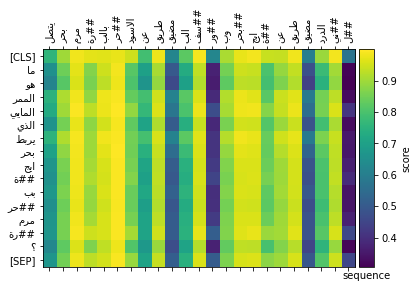

100%|██████████| 1/1 [00:00<00:00,  1.97batches/s]


Post-processing 1 example predictions split into 1 features.


  0%|          | 0/1 [00:00<?, ?it/s]

['[CLS]', 'ما', 'هو', 'الممر', 'المايي', 'الذي', 'يربط', 'بحر', 'ايج', '##ة', 'بب', '##حر', 'مرم', '##رة', '؟', '[SEP]', 'coordinates', ':', 'تص', '##غير', '|', 'بحر', 'مرم', '##رة', 'كما', 'يبدو', 'من', 'مدينة', 'اسطنبول', 'ويظهر', 'فن', '##ار', '.', 'بحر', 'مرم', '##رة', 'بحر', 'داخلي', 'يربط', 'البحر', 'الاسود', 'بب', '##حر', 'ايج', '##ة', 'ويف', '##صل', 'الجزء', 'الاسيوي', 'لتركيا', 'عن', 'جز', '##يها', 'الاوروبي', 'فت', '##طل', 'عليه', 'مدينة', 'اسطنبول', '.', '[', '1', ']', '[', '2', ']', '[', '3', ']', 'يتصل', 'بحر', 'مرم', '##رة', 'بالب', '##حر', 'الاسود', 'عن', 'طريق', 'مضيق', 'الب', '##سف', '##ور', 'وب', '##بحر', 'ايج', '##ة', 'عن', 'طريق', 'مضيق', 'الدرد', '##ني', '##ل', '.', 'تصل', 'مسا', '##حته', 'الاجمالية', 'لح', '##والي', '11', '.', '350', 'و', 'يبلغ', 'طوله', 'حوالي', '225', 'كم', 'اما', 'عرضه', '65', 'كم', 'عند', 'اقصى', 'اتساع', 'له', '،', 'ومت', '##وسط', 'مل', '##وحت', '##ه', 'هي', '22', 'جزءا', 'في', 'الالف', '،', 'وهذه', 'نسبة', 'اعلى', 'من', 'نسبة', 'مل', '##وحة'

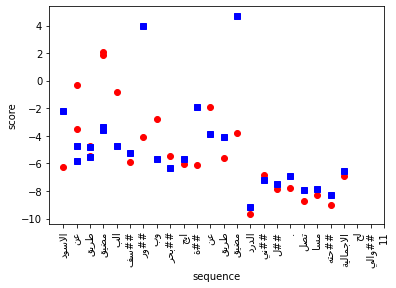

100%|██████████| 1/1 [00:01<00:00,  1.43s/it]


OrderedDict([('arabic-2634668245002151659-0', 'مضيق الدردنيل')])

In [ ]:
# check example one 
# preprocess data
import pandas as pd

print(dev_data[368])
print(wikidata_dev_concepts[368])

proc = Processing(entity2idx, model_name)
val_features= []
all_offsetmapping = []
val_example_id = []

ft, offset_mapping, example_id = proc.prepare_validation_features(dev_data[368], wikidata_dev_concepts[368])

for f in ft:
     val_features.append(f)   
for off in offset_mapping:
     all_offsetmapping.append(off)
for ex in example_id:
     val_example_id.append(ex)



# Convert to Tensors and build dev set

all_input_ids = torch.tensor([f['input_ids'] for f in val_features], dtype=torch.long)
all_attention_masks = torch.tensor([f['attention_masks'] for f in val_features], dtype=torch.long)
all_token_type_ids = torch.tensor([f['token_type_ids'] for f in val_features], dtype=torch.long)
all_concept_ids = torch.tensor([f['concept_ids'] for f in val_features], dtype=torch.long)
all_padded_concepts_mask = torch.tensor([f['padded_concepts_mask'] for f in val_features], dtype=torch.bool)
all_start_positions = torch.tensor([f['start_positions'] for f in val_features], dtype=torch.long)
all_end_positions = torch.tensor([f['end_positions'] for f in val_features], dtype=torch.long)

print('all_input_id shape: ', all_input_ids.shape)
print('all_attention_masks shape: ', all_attention_masks.shape)
print('all_token_type_ids shape: ', all_token_type_ids.shape)
print('all_concept_ids shape: ', all_concept_ids.shape)
print('all_padded_concepts_mask shape: ', all_padded_concepts_mask.shape)
print('all_start_positions shape: ', all_start_positions.shape)
print('all_end_positions shape: ', all_end_positions.shape)



dev_data_tensor = TensorDataset(
                all_input_ids,
                all_attention_masks,
                all_token_type_ids,
                all_start_positions,
                all_end_positions, 
                all_concept_ids,
                all_padded_concepts_mask
                
            )


dev = DatasetArabicTyDiQA(dev_data_tensor)
dev_loader = DataLoader(dev, batch_size=1, num_workers=0)

# use CUDA
device = torch.device("cuda")
model.to(device)
model.eval()

test_loader = tqdm(dev_loader, total=len(dev_loader), unit="batches")

with torch.no_grad():
         for i_batch, batch in enumerate(test_loader):
                    
           model.zero_grad(set_to_none=True)
           #add data to device (features and labels)
           input_ids = batch[0].to(device)
           attention_mask = batch[1].to(device)
           token_type_ids = batch[2].to(device)
           start_positions = batch[3].to(device)
           end_positions = batch[4].to(device)
           concept_ids = batch[5].to(device)
           all_padded_concepts_mask= batch[6].to(device)
   
           start_logits, end_logits, loss= model(input_ids, attention_mask, token_type_ids, start_positions, end_positions, concept_ids, all_padded_concepts_mask, 1, is_training= False, analysis= True)

proc.postprocess_qa_predictions_analysis(dev_data[368], val_features, val_example_id, all_offsetmapping , start_logits , end_logits)  